In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum
from scipy.io import loadmat, savemat 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\tkalra\AppData\Local\Continuum\anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [18]:
# 1. Read a time stacked image.. with vertical axis as distance and horizontal axis of time - currently done manually 
matstack = loadmat('bispectral_FI_intervals.mat') #,'f_FI','fv_post_FI','fv_neg_FI')
#                  save('bispectral_FI_intervals.mat', 'f_neg_Su_FI_1st', 'f_post_Su_FI_2nd');

#xx = matstack['f_FI']
#times=1/xx 
df=0.015625  ; # bandwidth

#freq = 1 #Hz
exposure = 1050  # seconds
times = np.arange(0, exposure, 1050/64)  # 1050/64 seconds
counts= matstack['f_post_Su_FI_2nd']
print(times)
counts=np.squeeze(counts)
print(np.size(times))

#print(np.type(counts))
#Sv  = matstack['Sv_subset']

[   0.        16.40625   32.8125    49.21875   65.625     82.03125
   98.4375   114.84375  131.25     147.65625  164.0625   180.46875
  196.875    213.28125  229.6875   246.09375  262.5      278.90625
  295.3125   311.71875  328.125    344.53125  360.9375   377.34375
  393.75     410.15625  426.5625   442.96875  459.375    475.78125
  492.1875   508.59375  525.       541.40625  557.8125   574.21875
  590.625    607.03125  623.4375   639.84375  656.25     672.65625
  689.0625   705.46875  721.875    738.28125  754.6875   771.09375
  787.5      803.90625  820.3125   836.71875  853.125    869.53125
  885.9375   902.34375  918.75     935.15625  951.5625   967.96875
  984.375   1000.78125 1017.1875  1033.59375]
64


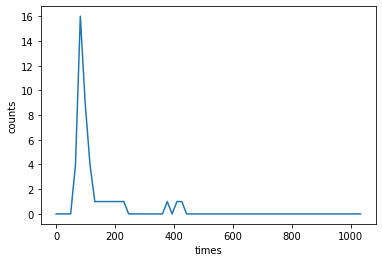

In [19]:

#times = np.arange(1,11)
#counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])


lc = lightcurve.Lightcurve(times,counts)
print(lc)
lc.plot(labels=['times','counts'])

window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')#lc.counts

In [20]:
window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')
#bs = Bispectrum(lc)


In [21]:
bs.freq


array([-0.03047619, -0.02925714, -0.0280381 , -0.02681905, -0.0256    ,
       -0.02438095, -0.0231619 , -0.02194286, -0.02072381, -0.01950476,
       -0.01828571, -0.01706667, -0.01584762, -0.01462857, -0.01340952,
       -0.01219048, -0.01097143, -0.00975238, -0.00853333, -0.00731429,
       -0.00609524, -0.00487619, -0.00365714, -0.0024381 , -0.00121905,
        0.        ,  0.00121905,  0.0024381 ,  0.00365714,  0.00487619,
        0.00609524,  0.00731429,  0.00853333,  0.00975238,  0.01097143,
        0.01219048,  0.01340952,  0.01462857,  0.01584762,  0.01706667,
        0.01828571,  0.01950476,  0.02072381,  0.02194286,  0.0231619 ,
        0.02438095,  0.0256    ,  0.02681905,  0.0280381 ,  0.02925714,
        0.03047619])

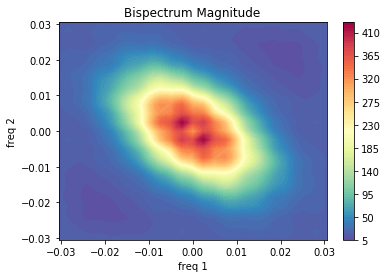

In [22]:
p = bs.plot_mag()
p.show()

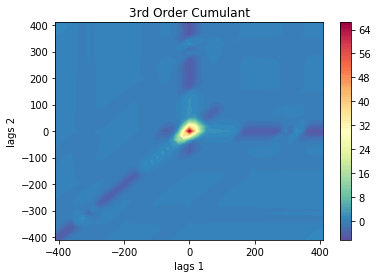

In [23]:
p = bs.plot_cum3()


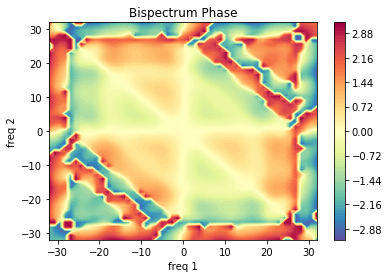

In [8]:
p = bs.plot_phase()
